# Example Opendap

from uidaho.edu examples

- %Filename: 	OPeNDAPExample_TimeSeries_macav2metdata_SimpleExample.py
- %Author:	K. Hegewisch (khegewisch@uidaho.edu)
- %Updated: 	03/13/2016
- %Description: 	This script uses OPeNDAP to download the specified subset of the MACAv2-METDATA data
- %Requirements: 	This script was run using Python 2.7.3, the Enthought distribution (www.enthought.com)
- %	        Python comes with native OPeNDAP support.	


In [1]:
# %Filename: 	OPeNDAPExample_TimeSeries_macav2metdata_SimpleExample.py
#%Author:	K. Hegewisch (khegewisch@uidaho.edu)
#%Updated: 	03/13/2016
#%Description: 	This script uses OPeNDAP to download the specified subset of the MACAv2-METDATA data
#%Requirements: 	This script was run using Python 2.7.3, the Enthought distribution (www.enthought.com)
#%	        Python comes with native OPeNDAP support.	


In [2]:
#! pip install --user netCDF4

In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#=========================================================
#            SET TARGET DATA 
#=========================================================
#day=1
lat_target=45.0
lon_target=360-117.0


In [5]:
#=========================================================
#             SET OPENDAP PATH 
#=========================================================
pathname = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_huss_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc'


In [6]:
#=========================================================
#             GET DATA HANDLES
#=========================================================
filehandle=Dataset(pathname,'r',format="NETCDF4")
lathandle=filehandle.variables['lat']
lonhandle=filehandle.variables['lon']
timehandle=filehandle.variables['time']
datahandle=filehandle.variables['specific_humidity']



In [7]:
#=========================================================
#             GET DATA 
#=========================================================
#get data
time_num=365
timeindex=range(0,time_num,1)  #python starts arrays at 0
time=timehandle[timeindex]
lat = lathandle[:]
lon = lonhandle[:]


In [8]:
#=========================================================
#find indices of target lat/lon/day
lat_index = (np.abs(lat-lat_target)).argmin()
lon_index = (np.abs(lon-lon_target)).argmin()
#check final is in right bounds
if(lat[lat_index]>lat_target):
	if(lat_index!=0):
		lat_index = lat_index - 1
if(lat[lat_index]<lat_target):
	if(lat_index!=len(lat)):
		lat_index =lat_index +1
if(lon[lon_index]>lon_target):
	if(lon_index!=0):
		lon_index = lon_index - 1
if(lon[lon_index]<lon_target):
	if(lon_index!=len(lon)):
		lon_index = lon_index + 1
lat=lat[lat_index]
lon=lon[lon_index]


In [9]:
#=========================================================
#get data
data = datahandle[timeindex,lat_index,lon_index]


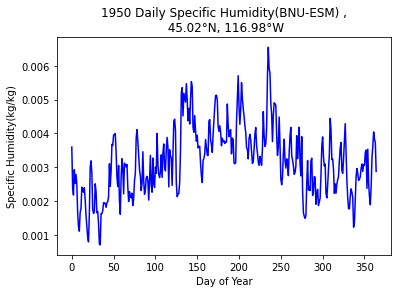

In [10]:
#=========================================================
#              MAKE A PLOT
#=========================================================
days = np.arange(0,len(time))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(u'Day of Year')
ax.set_ylabel(u'Specific Humidity(kg/kg)')
ax.set_title(u'1950 Daily Specific Humidity(BNU-ESM) ,\n %4.2f\u00b0N, %4.2f\u00b0W' % (lat, abs(360-lon)))
ax.ticklabel_format(style='plain')
ax.plot(days,data,'b-')
plt.savefig("myPythonGraph.png")
plt.show()


In [11]:
!ls

 00-organize-maca-inputs.ipynb	'MACA inputs.xlsx'
 01-opendap-example.ipynb	 myPythonGraph.png


In [14]:
#

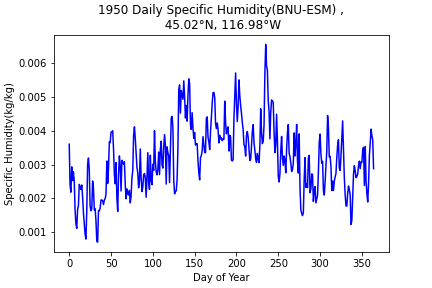

In [15]:
from IPython.display import Image
Image(filename='myPythonGraph.png') 